In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [6]:
data = pd.read_csv("/content/sample_data/adult_with_headers (1).csv")

In [7]:
df= pd.DataFrame(data)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8965 entries, 0 to 8964
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             8965 non-null   int64 
 1   workclass       8965 non-null   object
 2   fnlwgt          8965 non-null   int64 
 3   education       8965 non-null   object
 4   education_num   8965 non-null   int64 
 5   marital_status  8965 non-null   object
 6   occupation      8965 non-null   object
 7   relationship    8965 non-null   object
 8   race            8965 non-null   object
 9   sex             8965 non-null   object
 10  capital_gain    8965 non-null   int64 
 11  capital_loss    8965 non-null   int64 
 12  hours_per_week  8965 non-null   int64 
 13  native_country  8965 non-null   object
 14  income          8965 non-null   object
dtypes: int64(6), object(9)
memory usage: 1.0+ MB


In [9]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [10]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,8965.000000,8.965000e+03,8965.000000,8965.000000,8965.000000,8965.000000
mean,38.442722,1.902449e+05,10.076297,1070.066815,89.187730,40.547909
std,13.574919,1.060791e+05,2.543592,7341.281254,404.037313,12.325320
min,17.000000,1.930200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.179270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.786150e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.384150e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.226583e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
print(display(df))

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8960,57,Local-gov,339163,Some-college,10,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,Mexico,<=50K
8961,59,Self-emp-not-inc,124771,Bachelors,13,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,30,United-States,<=50K
8962,32,Private,167531,Prof-school,15,Married-civ-spouse,Prof-specialty,Wife,Asian-Pac-Islander,Female,15024,0,50,United-States,>50K
8963,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K


None


In [12]:
num_cols= ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']

#Imputation
for col in num_cols:
  if df[col].isnull().any():
    df[col].fillna(df[col].mean(), inplace=True)

print("Missing Values after imputation:",df[num_cols].isnull().sum())


Missing Values after imputation: age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64


In [13]:
#Applying Standard Scaler
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

display(df_scaled.head())

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.041054,State-gov,-1.062747,Bachelors,1.149503,Never-married,Adm-clerical,Not-in-family,White,Male,0.150382,-0.220754,-0.044456,United-States,<=50K
1,0.851417,Self-emp-not-inc,-1.008114,Bachelors,1.149503,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145768,-0.220754,-2.235191,United-States,<=50K
2,-0.032615,Private,0.239468,HS-grad,-0.423164,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145768,-0.220754,-0.044456,United-States,<=50K
3,1.072426,Private,0.419297,11th,-1.209498,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145768,-0.220754,-0.044456,United-States,<=50K
4,-0.769309,Private,1.396811,Bachelors,1.149503,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145768,-0.220754,-0.044456,Cuba,<=50K


In [14]:
display(df_scaled.describe())

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,8.965000e+03,8.965000e+03,8.965000e+03,8.965000e+03,8.965000e+03,8.965000e+03
mean,-9.808105e-17,3.725099e-17,1.846698e-16,3.526955e-17,3.110854e-17,2.607569e-16
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-1.579672e+00,-1.611556e+00,-3.568498e+00,-1.457684e-01,-2.207536e-01,-3.208851e+00
25%,-7.693088e-01,-6.817736e-01,-4.231641e-01,-1.457684e-01,-2.207536e-01,-4.445638e-02
50%,-1.062844e-01,-1.096400e-01,-2.999733e-02,-1.457684e-01,-2.207536e-01,-4.445638e-02
75%,6.304093e-01,4.541219e-01,7.563362e-01,-1.457684e-01,-2.207536e-01,3.612352e-01
max,3.798192e+00,9.770033e+00,2.329003e+00,1.347646e+01,1.056103e+01,4.742705e+00


In [15]:
#Applying Min Max Scaler
min_max_scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[num_cols] = min_max_scaler.fit_transform(df[num_cols])
display(df_scaled.head())

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,State-gov,0.048219,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.053019,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,0.162633,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,0.178433,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,0.264319,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba,<=50K


In [16]:
display(df_scaled.describe())

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,8965.000000,8965.000000,8965.000000,8965.000000,8965.000000,8965.000000
mean,0.293736,0.141593,0.605086,0.010701,0.020475,0.403550
std,0.185958,0.087866,0.169573,0.073414,0.092754,0.125769
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.081692,0.533333,0.000000,0.000000,0.397959
50%,0.273973,0.131960,0.600000,0.000000,0.000000,0.397959
75%,0.410959,0.181493,0.733333,0.000000,0.000000,0.448980
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


●	Discuss the scenarios where each scaling technique is preferred and why.

1. Standard Scaling: Standard Scaling transform sdata to have a mean of 0 and a Standard deviation of 1. Standard Scaling is sensitive to outlier beacuse the mean and standard deviation are heavily influenced by extreme values.

**Why:**


*   Center the data: It centers the feature around zero, which is beneficial for algorithms that assume a zero-centered input eg. using gradient descent
*   Equalizes variance: It scales features such that they hve unit variance, preventing feature with larger variances from domination the learning process.

*   It handeles feature with vastly diffrent orignals ranges by transforming them into a comparable scale.

2. Min-Max Scaling:Min-Max scaling is used within a specific range(eg. [0,1] or [-1,1]), then Min Max scaling is appropriate choice.These domains often requires features to be in specific bounded range.

**Why:**


*   Bounds the data: It scales all features to predefiend range, which can prevent issues with algorithms that are sensitive to large input values.
*  Simple and intuitive: The transformation is straightforward, and the resulting values are easy to ntercept within their new bounded range.








In [17]:
#Applying the one-hot encoding to categorical values
from sklearn.preprocessing import OneHotEncoder


In [18]:
categorical_cols = df.select_dtypes(include=['object']).columns

df_encoded = df.copy()

#Applying one-ot encoding to cateorical variable
for col in categorical_cols:
  encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
  encoded_features = encoder.fit_transform(df[[col]])
  encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out([col]))
  df_encoded = pd.concat([df_encoded, encoded_df], axis=1)
  df_encoded = df_encoded.drop(columns=[col])

#Display the head of the DataFrame with encoded features
display(df_encoded.head())

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ <=,income_ <=50K,income_ >50K
0,39,77516,13,2174,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,50,83311,13,0,0,13,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,38,215646,9,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,53,234721,7,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,28,338409,13,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
categorical_cols = df.select_dtypes(include=['object']).columns

df_label_encoded = df.copy()

#Applying Label encoding to categoricals variables
for col in categorical_cols:
  encoder = LabelEncoder()
  df_label_encoded[col] = encoder.fit_transform(df[col])

#Display the head of the DataFrame with encoded features
display(df_label_encoded.head())

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,38,1
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,38,1
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,38,1
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,38,1
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,1


In [22]:
from pandas.core.dtypes import dtypes
#Data Exploration
df.describe()
df.isnull().sum()
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8965 entries, 0 to 8964
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             8965 non-null   int64 
 1   workclass       8965 non-null   object
 2   fnlwgt          8965 non-null   int64 
 3   education       8965 non-null   object
 4   education_num   8965 non-null   int64 
 5   marital_status  8965 non-null   object
 6   occupation      8965 non-null   object
 7   relationship    8965 non-null   object
 8   race            8965 non-null   object
 9   sex             8965 non-null   object
 10  capital_gain    8965 non-null   int64 
 11  capital_loss    8965 non-null   int64 
 12  hours_per_week  8965 non-null   int64 
 13  native_country  8965 non-null   object
 14  income          8965 non-null   object
dtypes: int64(6), object(9)
memory usage: 1.0+ MB


In [23]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [24]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


●	Discuss the pros and cons of One-Hot Encoding and Label Encoding.



### One-Hot Encoding
**Best for nominal data (colors, countries) where no order exists.**

**Pros:**
Prevents the model from thinking one category is "better" than another.

**Cons:** Creates too many columns if you have many categories (high dimensionality).

### Label Encoding

**Best for ordinal data (small, medium, large) where a clear order exists.**

**Pros:**
Keeps the dataset small and simple by using only one column.

**Cons:** Trick's the model into finding rankings or patterns in data that shouldn't have them.



In [25]:
#Creating a copy of DataFrome to add new features
df_features = df.copy()

#Feature 1: capital_diff (Net Capital Gai or loss)
df_features['capital_diff'] = df_features['capital_gain'] - df_features['capital_loss']

#Feature 2: is_married (Binary indicator for being married)
#Assuming 'Married-civ-spouse' is the primary indicator for being married in this dataset
df_features['is_married'] = df_features['marital_status'].apply(lambda x: 1 if 'Married-civ-spouse' in x else 0)

#Display the head of the DataFrame with the new features
display(df_features.head())

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,capital_diff,is_married
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,2174,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,1


Rationale for New features:
1. capital_diff(Net Capital Gain or loss):

* Rationale: The capital_gain and capital_loss columns represents financial transactions that can significantly impact an individual's overall financial standing and consequently their income level. combining them into we get the capital_diff ,which provides the imformation of net capital movement.Here, the positive value indicates the net gain and negative indicates the net loss.

2. is_married(Binary Married status):
*   Rationale:Marital status is often a strong sociologically and economically indicator that can be correlated to the income.Here, being married can imply shared the financial resources, household stability or different career trajectories compared to other marital status.Creating a binary feature is_marries(1 if married, 0 otherwise) simplifies the marital_status.



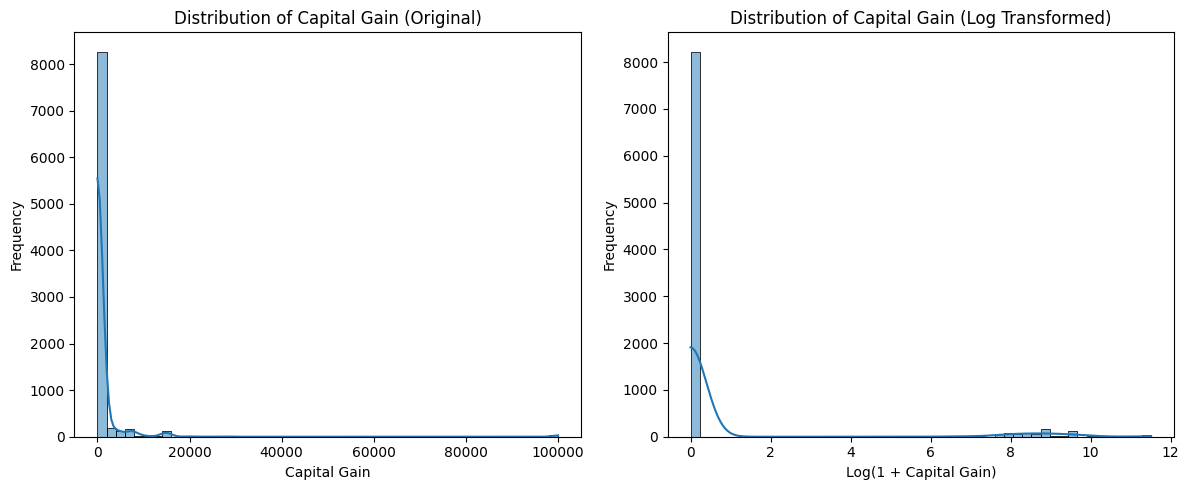

,capital_gain,capital_gain_log
0,2174,7.684784
1,0,0.000000
2,0,0.000000
3,0,0.000000
4,0,0.000000


In [26]:
#create a copy of the dataframe to apply transformation
df_transformed = df.copy()

#identiy a skewd numeical feature: capital_gain
#Apply log transformation to handle zero vaues in capital_gain
df_transformed['capital_gain_log'] = np.log1p(df_transformed['capital_gain'])

#visualize the distribution before and after
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df_transformed['capital_gain'], bins=50, kde=True)
plt.title('Distribution of Capital Gain (Original)')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(df_transformed['capital_gain_log'], bins=50, kde=True)
plt.title('Distribution of Capital Gain (Log Transformed)')
plt.xlabel('Log(1 + Capital Gain)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

display(df_transformed[['capital_gain', 'capital_gain_log']].head())

### Justification for Skewed Feature Transformation:

**Feature Chosen:** Capital_gain

**Used to "squash" extreme values and make skewed data more manageable.**

**Handling Skewness:** It pulls extreme outliers closer to the average, creating a more normal bell-curve shape.

**Model Accuracy**: Most algorithms perform better when features aren't dominated by a few massive values.
**Transformation Applied:** Log transformation, specifically np.log1p(x) (which calculates log(1+x)).

**Variance Stability:** It ensures the "spread" of the data is more consistent, preventing the model from getting confused by huge gaps.
